In [1]:
import pandas as pd
import joblib

In [14]:
df = pd.read_excel("data/tweet_bersih_100.xlsx")
twet = df.tweet.tolist()
label = df.label.tolist()
df.head()

,Unnamed: 0,tweet,label
0,0,buka visi misi begitu pukau sehingga buat pres...,positive
1,1,lebih baik pakai teknologi lama kaya negara in...,positive
2,2,kok arguing without crying kokarguing arguingw...,positive
3,3,jalan politik politik satu bukan politik pecah...,positive
4,4,juga fans lihat tampil serang hahaha jugafans ...,negative


negative    500
positive    500
Name: label, dtype: int64


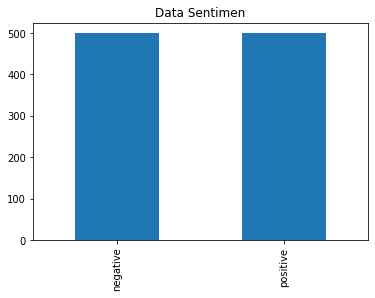

In [15]:
pd.value_counts(df['label']).plot.bar(title='Data Sentimen')
print(pd.value_counts(df['label']))

# Pembagian data & pemodelan

In [16]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = twet
vectorizer = TfidfVectorizer()
save = vectorizer.fit(corpus)
joblib.dump(save,"model/tdidf.w")
X = vectorizer.fit_transform(corpus)

In [18]:
k = 10
y = np.array(label)
kf = KFold(n_splits=k)
kf.get_n_splits(X)
# print(kf)
alpah_list = np.arange(0.1, 1+0.001, 0.001)
rerata = list()
for alpha in alpah_list:
    clf = MultinomialNB(alpha = alpha)
    sc_10 = list()
    for train_index, test_index in kf.split(X):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        sc = clf.score(X_test, y_test)
        sc_10.append(sc)
#     print( sum(sc_10)/k, "|", alpha)
    rerata.append(sum(sc_10)/k)
dict_ = {
    "alpha":alpah_list,
    "score":rerata
}
df_hasil = pd.DataFrame.from_dict(dict_)
sorted_ = df_hasil.sort_values("score", axis = 0, ascending = False)
sorted_.head(10)

,alpha,score
0,0.100,0.817
1,0.101,0.817
2,0.102,0.816
3,0.103,0.816
4,0.104,0.815
5,0.105,0.814
6,0.106,0.814
22,0.122,0.813
21,0.121,0.813
20,0.120,0.813


In [19]:
sorted_.alpha.tolist()[0]

0.1

In [20]:
clf = MultinomialNB(alpha = sorted_.alpha.tolist()[0])
save = clf.fit(X_train, y_train)
joblib.dump(save,"model/naive_bayes.m")

['model/naive_bayes.m']

In [21]:
save.score(X, y)

0.983

In [22]:
x = save.predict(X)

In [13]:
ixx = 0
labelA = list()
labelP= list()

for i, j in zip(label, x):
    if i !=j:
        print(ixx)
        print(j)
        print("label asli",i)
        print(twet[ixx])
        print()
    ixx+=1

438
negative
label asli positive
apresiasi saudara 2 di papua utk pakde jadi percuma kalian tebar bohong bhw papua derita apresiasisaudara saudara2 2di dipapua papuautk utkpakde pakdejadi jadipercuma percumakalian kaliantebar tebarbohong bohongbhw bhwpapua papuaderita apresiasisaudara2 saudara2di 2dipapua dipapuautk papuautkpakde utkpakdejadi pakdejadipercuma jadipercumakalian percumakaliantebar kaliantebarbohong tebarbohongbhw bohongbhwpapua bhwpapuaderita

541
negative
label asli positive
tidak paham ekonomi investasi asing lingkup bisnis di-framing olah negara asai asing cara militan tidakpaham pahamekonomi ekonomiinvestasi investasiasing asinglingkup lingkupbisnis bisnisdi-framing di-framingolah olahnegara negaraasai asaiasing asingcara caramilitan tidakpahamekonomi pahamekonomiinvestasi ekonomiinvestasiasing investasiasinglingkup asinglingkupbisnis lingkupbisnisdi-framing bisnisdi-framingolah di-framingolahnegara olahnegaraasai negaraasaiasing asaiasingcara asingcaramilitan

830
p